In [1]:
import pandas as pd
import os 

Соберем все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [2]:
os.getcwd()

'C:\\Users\\Семья Ку\\jupyter_lessons'

In [3]:
os.listdir('C:\\Users\\Семья Ку\\jupyter_lessons\\data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [4]:
# Путь к файлам
path = 'C:\\Users\\Семья Ку\\jupyter_lessons\\data'

In [5]:
# создаем пустой датафрейм
df = pd.DataFrame()

# Считывает данные из всех файлов в папке дата и добавляем их в новый датафрейм
for current_path, dirs, files in os.walk(path):
    for file in files:
        # создаем полный путь до каждого файла 
        data_path = f'{current_path}\\{file}'
        
        #считываем данные из файла
        read_data = pd.read_csv(data_path)
        
        # достаем имя покупателя и дату покупки из строчек пути к файлу 
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
       
        
        #добавляем в новые колонки
        read_data['date'] = date
        read_data['name'] = name
        
        #добавл данные к пустому датафрему
        df = pd.concat((df, read_data))

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


Выясним, какой пользователь купил больше всего товаров

In [11]:
df.groupby('name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Найдем топ-10 товаров по числу проданных единиц за всё время


In [13]:
product = df.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

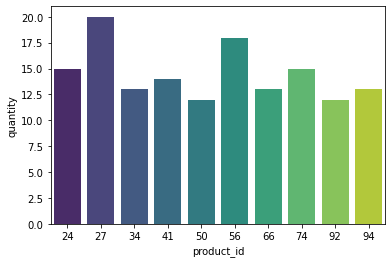

In [15]:
# Визуализируем полученный результат
sns.barplot(data=product, x='product_id', y='quantity', palette='viridis')

Визуализируем продажи по дням

In [16]:
days = df.groupby('date', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
days

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


<AxesSubplot:xlabel='date', ylabel='quantity'>

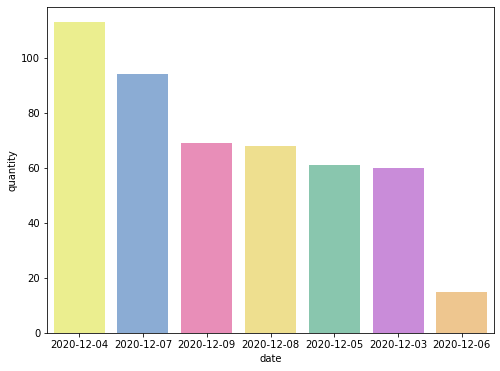

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=days, x='date', y='quantity', palette='prism', alpha=0.5)

Узнаем сколько пользователей приобрели какой-либо товар повторно (более 1 раза)(повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни) 

In [25]:
df.groupby(['name', 'product_id']).agg({'date': 'nunique'}).query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
